In [2]:
!pip install patchify
!pip install git+https://github.com/qubvel/segmentation_models


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/qubvel/segmentation_models to /tmp/pip-req-build-x8x1u58x
  Running command git clone --filter=blob:none --quiet https://github.com/qubvel/segmentation_models /tmp/pip-req-build-x8x1u58x
  Resolved https://github.com/qubvel/segmentation_models to commit e951c6747f75fa9e7240816d1c79dd2e66813123
  Running command git submodule update --init --recursive -q
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 6.5 MB/s eta 0:00:00
  Created wheel for segmentation-models: filename=segmentation_models-1.0.1-py3-none-any.whl size=33806 sha256=ad546b7e91e7a4569fefdb06525bb6eefe1ddf878e056f6a033a3021ece119cd
  Stored in directory: /tmp/pip-ephem-wheel-cache-dwx6n5wa/wheels/7e/e5/3d/85e32947c53e03f210361da47652f05b6f4e1c3e58f20

In [3]:
import numpy as np
from matplotlib import pyplot as plt
from patchify import patchify
import tifffile as tiff
from skimage.transform import resize
import tensorflow as tf
from PIL import Image
import os

In [5]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [4]:
drive_path = "/content/drive/MyDrive"

In [ ]:
# Set the input folder path and the output TIFF file path
input_folder = '/content/drive/MyDrive/dataset/Images for training gray'
output_tiff = '/content/drive/MyDrive/dataset/output_images_test.tif'

# Create an empty list to hold the image data
image_data = []

# Loop through each file in the input folder
for filename in os.listdir(input_folder):
    # Check if the file is an image file
    if filename.endswith('.png') or filename.endswith('.jpg') or filename.endswith('.jpeg'):
        # Open the image and add it to the list
        image = Image.open(os.path.join(input_folder, filename))
        image_data.append(image)

# Save the list of images as a multi-page TIFF file
image_data[0].save(output_tiff, save_all=True, append_images=image_data[1:])

In [ ]:
large_image_stack = tiff.imread('./drive/MyDrive/dataset/output_image_gray.tif')
large_mask_stack = tiff.imread('./drive/MyDrive/dataset/output_gray.tif')

In [ ]:
from PIL import Image
import numpy as np



# Open the TIFF file using Pillow
with Image.open('./drive/MyDrive/dataset/output_image_gray.tif') as img:
    large_image_stack = []
    # Loop through each image in the TIFF file
    for i in range(img.n_frames):
        # Load the image data into a NumPy array
        img.seek(i)
        data = np.array(img)
        large_image_stack.append(data)
        # Do something with the image data...
        print(f"Image {i+1}: shape = {data.shape}, dtype = {data.dtype}")


# Open the TIFF file using Pillow
with Image.open('./drive/MyDrive/dataset/output_gray.tif') as img:
    # Loop through each image in the TIFF file
    large_mask_stack = []
    for i in range(img.n_frames):
        # Load the image data into a NumPy array
        img.seek(i)
        data = np.array(img)
        print(data.shape[0])
        large_mask_stack.append(data)
        # Do something with the image data...
        print(f"Image {i+1}: shape = {data.shape}, dtype = {data.dtype}")



def convert_stack(image_data):
    # Find the maximum size of each dimension among all the arrays
    max_shape = np.max([arr.shape for arr in image_data], axis=0)

    # Create a new array with the maximum shape and a new dimension with size 1
    image_array = np.zeros((len(image_data),) + tuple(max_shape), dtype=image_data[0].dtype)

    # Copy each array into the new array
    for i, arr in enumerate(image_data):
        image_array[i, :arr.shape[0], :arr.shape[1]] = arr

    # Print the shape and data type of the array
    print(f"Image array: shape = {image_array.shape}, dtype = {image_array.dtype}")

    return image_array


large_image_stack = convert_stack(large_image_stack)
large_mask_stack = convert_stack(large_mask_stack)




Image 1: shape = (4032, 3024), dtype = uint8
Image 2: shape = (4032, 3024), dtype = uint8
Image 3: shape = (4032, 3024), dtype = uint8
Image 4: shape = (4032, 3024), dtype = uint8
Image 5: shape = (4080, 3072), dtype = uint8
Image 6: shape = (4080, 3072), dtype = uint8
Image 7: shape = (4080, 3072), dtype = uint8
Image 8: shape = (4080, 3072), dtype = uint8
Image 9: shape = (4080, 3072), dtype = uint8
Image 10: shape = (4080, 3072), dtype = uint8
Image 11: shape = (4080, 3072), dtype = uint8
Image 12: shape = (4080, 3072), dtype = uint8
Image 13: shape = (4080, 3072), dtype = uint8
Image 14: shape = (549, 883), dtype = uint8
Image 15: shape = (615, 466), dtype = uint8
Image 16: shape = (779, 529), dtype = uint8
Image 17: shape = (743, 525), dtype = uint8
Image 18: shape = (750, 521), dtype = uint8
Image 19: shape = (505, 1023), dtype = uint8
Image 20: shape = (781, 525), dtype = uint8
Image 21: shape = (760, 518), dtype = uint8
4032
Image 1: shape = (4032, 3024), dtype = uint8
4032
Ima

In [ ]:
print(large_image_stack.shape)
print(large_mask_stack.shape)

(21, 4080, 3072)
(21, 4080, 3072)


In [ ]:
#large_mask_stack_resize = resize(large_mask_stack, (4, 2016, 1512))
#print(large_mask_stack_resize.shape)

(4, 2016, 1512)


In [ ]:
#large_mask_stack = large_mask_stack_resize

In [ ]:
#print(large_image_stack_resize.shape)
#l#arge_image_stack = large_image_stack_resize

(4, 2016, 1512)


In [ ]:
#print(large_image_stack.shape)
#print(large_mask_stack.shape)

(4, 2016, 1512)
(4, 2016, 1512)


In [ ]:
all_img_patches = []
for img in range(large_image_stack.shape[0]):
    #print(img)     #just stop here to see all file names printed
     
    large_image = large_image_stack[img]
    
    patches_img = patchify(large_image, (512, 512), step=512)  #Step=256 for 256 patches means no overlap
    
    for i in range(patches_img.shape[0]):
        for j in range(patches_img.shape[1]):
            
            single_patch_img = patches_img[i,j,:,:]
            single_patch_img = (single_patch_img.astype('float32')) / 255.
                  
            all_img_patches.append(single_patch_img)

In [ ]:
images = np.array(all_img_patches)

In [ ]:
images = np.stack((images,)*3, axis=-1)

In [ ]:
all_mask_patches = []
for img in range(large_mask_stack.shape[0]):
    #print(img)     #just stop here to see all file names printed
     
    large_mask = large_mask_stack[img]
    
    patches_mask = patchify(large_mask, (512, 512), step=512)  #Step=256 for 256 patches means no overlap
    
    for i in range(patches_mask.shape[0]):
        for j in range(patches_mask.shape[1]):
            
            single_patch_mask = patches_mask[i,j,:,:]
            single_patch_mask = single_patch_mask / 255.
            
            all_mask_patches.append(single_patch_mask)

In [ ]:
masks = np.array(all_mask_patches)
masks = np.expand_dims(masks, -1)

In [ ]:
print(images.shape)
print(masks.shape)
print("Pixel values in the mask are: ", np.unique(masks))

(882, 512, 512, 3)
(882, 512, 512, 1)
Pixel values in the mask are:  [0.         0.00392157 0.00784314 0.01176471 0.01568627 0.01960784
 0.02352941 0.02745098 0.03137255 0.96470588 0.96862745 0.97254902
 0.97647059 0.98039216 0.98431373 0.98823529 0.99215686 0.99607843
 1.        ]


In [ ]:
from distutils.sysconfig import get_python_lib
print(get_python_lib())

/usr/lib/python3/dist-packages


In [ ]:
import segmentation_models as sm

Segmentation Models: using `keras` framework.


In [ ]:
BACKBONE = 'resnet34'
preprocess_input1 = sm.get_preprocessing(BACKBONE)

In [ ]:
images1=preprocess_input1(images)
print(images1.shape)

(882, 512, 512, 3)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images1, masks, test_size = 0.20, random_state = 42)
print(X_train.shape)
print(X_test.shape)

(705, 512, 512, 3)
(177, 512, 512, 3)


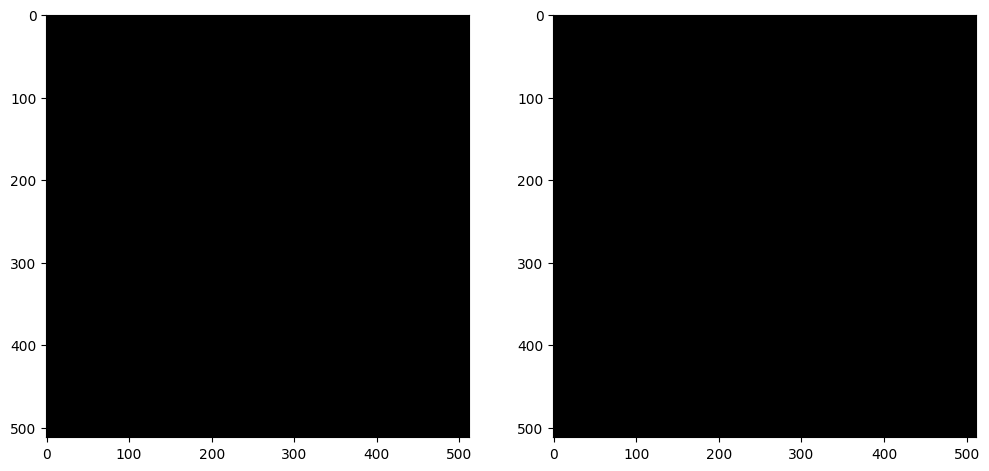

In [ ]:
import random
import numpy as np
image_number = random.randint(0, len(X_train))
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(X_train[image_number, :,:, 0], cmap='gray')
plt.subplot(122)
plt.imshow(np.reshape(y_train[image_number], (512, 512)), cmap='gray')
plt.show()

In [ ]:
seed=24
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
img_data_gen_args = dict(rotation_range=90,
                     width_shift_range=0.3,
                     height_shift_range=0.3,
                     shear_range=0.5,
                     zoom_range=0.3,
                     horizontal_flip=True,
                     vertical_flip=True,
                     fill_mode='reflect')

In [ ]:
mask_data_gen_args = dict(rotation_range=90,
                     width_shift_range=0.3,
                     height_shift_range=0.3,
                     shear_range=0.5,
                     zoom_range=0.3,
                     horizontal_flip=True,
                     vertical_flip=True,
                     fill_mode='reflect',
                     preprocessing_function = lambda x: np.where(x>0, 1, 0).astype(x.dtype)) #Binarize the output again. 

In [ ]:
image_data_generator = ImageDataGenerator(**img_data_gen_args)
image_data_generator.fit(X_train, augment=True, seed=seed)

In [ ]:
image_generator = image_data_generator.flow(X_train, seed=seed)
valid_img_generator = image_data_generator.flow(X_test, seed=seed)

In [ ]:
mask_data_generator = ImageDataGenerator(**mask_data_gen_args)
mask_data_generator.fit(y_train, augment=True, seed=seed)
mask_generator = mask_data_generator.flow(y_train, seed=seed)
valid_mask_generator = mask_data_generator.flow(y_test, seed=seed)

In [ ]:
def my_image_mask_generator(image_generator, mask_generator):
    train_generator = zip(image_generator, mask_generator)
    for (img, mask) in train_generator:
        yield (img, mask)

In [ ]:
my_generator = my_image_mask_generator(image_generator, mask_generator)

In [ ]:
validation_datagen = my_image_mask_generator(valid_img_generator, valid_mask_generator)

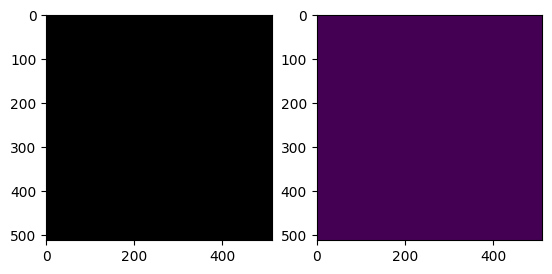

In [ ]:
x = image_generator.next()
y = mask_generator.next()
for i in range(0,1):
    image = x[i]
    mask = y[i]
    plt.subplot(1,2,1)
    plt.imshow(image[:,:,0], cmap='gray')
    plt.subplot(1,2,2)
    plt.imshow(mask[:,:,0])
    plt.show()

In [ ]:
model = sm.Unet(BACKBONE, encoder_weights='imagenet')
model.compile('Adam', loss=sm.losses.bce_jaccard_loss, metrics=[sm.metrics.iou_score])
print(model.summary())

85521592/85521592 [==============================] - 60s 1us/step
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 data (InputLayer)              [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 bn_data (BatchNormalization)   (None, None, None,   9           ['data[0][0]']                   
                                3)                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, None, None,   0          ['bn_data[0][0]']                
                          

In [ ]:
################################
#Modelcheckpoint
checkpointer = tf.keras.callbacks.ModelCheckpoint('/content/drive/My Drive/Colab Notebooks/model_boulder.h5', verbose=1, save_best_only=True)

callbacks = [
        tf.keras.callbacks.ModelCheckpoint('/content/drive/My Drive/Colab Notebooks/model_boulder.h5', verbose=1, save_best_only=True),
        tf.keras.callbacks.EarlyStopping(patience=20, monitor='val_loss'),
        tf.keras.callbacks.TensorBoard(log_dir='logs')]

from keras import backend as K
K.set_value(model.optimizer.learning_rate, 0.1)

####################################

In [ ]:
history = model.fit(my_generator, validation_data=validation_datagen, steps_per_epoch=100, validation_steps=100, epochs=100, callbacks=callbacks)

Epoch 1/100
100/100 [==============================] - ETA: 0s - loss: 1.0828 - iou_score: 0.1125
Epoch 1: val_loss did not improve from 1.19024
100/100 [==============================] - 348s 4s/step - loss: 1.0828 - iou_score: 0.1125 - val_loss: 1.2208 - val_iou_score: 0.1577
Epoch 2/100
100/100 [==============================] - ETA: 0s - loss: 1.0674 - iou_score: 0.1204
Epoch 2: val_loss improved from 1.19024 to 1.08184, saving model to /content/drive/My Drive/Colab Notebooks/model_boulder.h5
100/100 [==============================] - 353s 4s/step - loss: 1.0674 - iou_score: 0.1204 - val_loss: 1.0818 - val_iou_score: 0.1261
Epoch 3/100
100/100 [==============================] - ETA: 0s - loss: 1.0499 - iou_score: 0.1343
Epoch 3: val_loss did not improve from 1.08184
100/100 [==============================] - 345s 3s/step - loss: 1.0499 - iou_score: 0.1343 - val_loss: 1.6364 - val_iou_score: 0.0768
Epoch 4/100
100/100 [==============================] - ETA: 0s - loss: 1.0177 - iou_s

In [ ]:
model.save('/content/drive/My Drive/Colab Notebooks/boulder.h5')

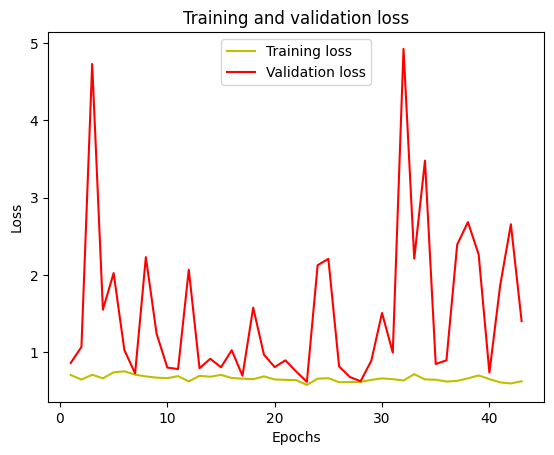

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
acc = history.history['iou_score']
#acc = history.history['accuracy']
val_acc = history.history['val_iou_score']
#val_acc = history.history['val_accuracy']

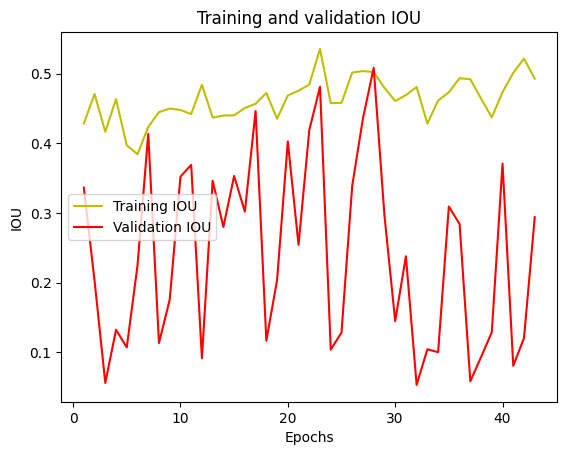

In [ ]:
plt.plot(epochs, acc, 'y', label='Training IOU')
plt.plot(epochs, val_acc, 'r', label='Validation IOU')
plt.title('Training and validation IOU')
plt.xlabel('Epochs')
plt.ylabel('IOU')
plt.legend()
plt.show()

In [ ]:
y_pred=model.predict(X_test)
y_pred_thresholded = y_pred > 0.5

24/24 [==============================] - 4s 121ms/step


In [ ]:
intersection = np.logical_and(y_test, y_pred_thresholded)
union = np.logical_or(y_test, y_pred_thresholded)
iou_score = np.sum(intersection) / np.sum(union)
print("IoU socre is: ", iou_score)

IoU socre is:  0.254631965228262


In [ ]:
test_img_number = random.randint(0, len(X_test)-1)
test_img = X_test[test_img_number]
test_img_input=np.expand_dims(test_img, 0)
ground_truth=y_test[test_img_number]
prediction = model.predict(test_img_input)
prediction = prediction[0,:,:,0]

1/1 [==============================] - 0s 22ms/step


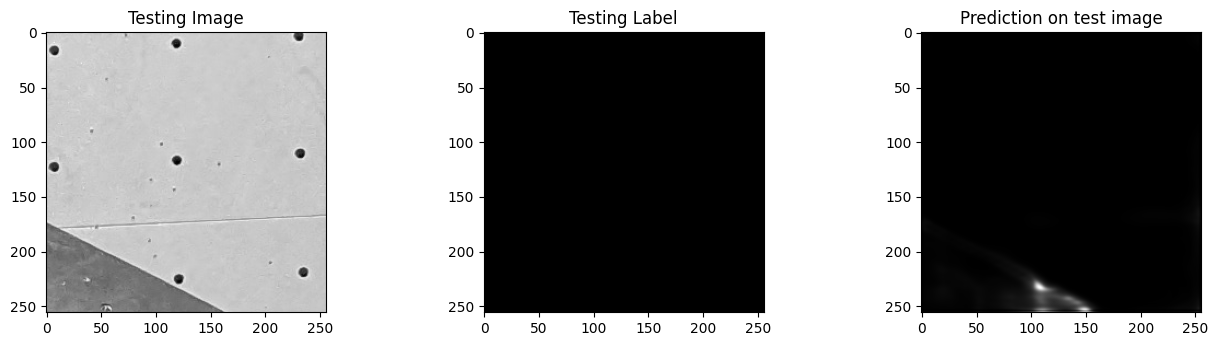

In [ ]:
plt.figure(figsize=(16, 8))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(test_img[:,:,0], cmap='gray')
plt.subplot(232)
plt.title('Testing Label')
plt.imshow(ground_truth[:,:,0], cmap='gray')
plt.subplot(233)
plt.title('Prediction on test image')
plt.imshow(prediction, cmap='gray')

In [ ]:
plt.show()